In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Reading train and test CSV files
train_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
test_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/test.csv')

# Drop data that doesn't have 'sii'
train_df = train_df.dropna(subset=['sii'])

# Drop columns that contain 'PCIAT', because this is not in the test dataset
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='PCIAT')))]
# Drop columns that contain 'Season'
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='Season')))]

train_df = train_df.drop(['id'], axis=1)
train_df = pd.get_dummies(train_df)

X = train_df.drop(['sii'], axis=1)
y = train_df['sii']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)
# Impute missing values in the training data
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

# Standardize the imputed data
scaler = StandardScaler()  # or MinMaxScaler() if you prefer scaling between 0 and 1
X_train_imputed = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_imputed = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)


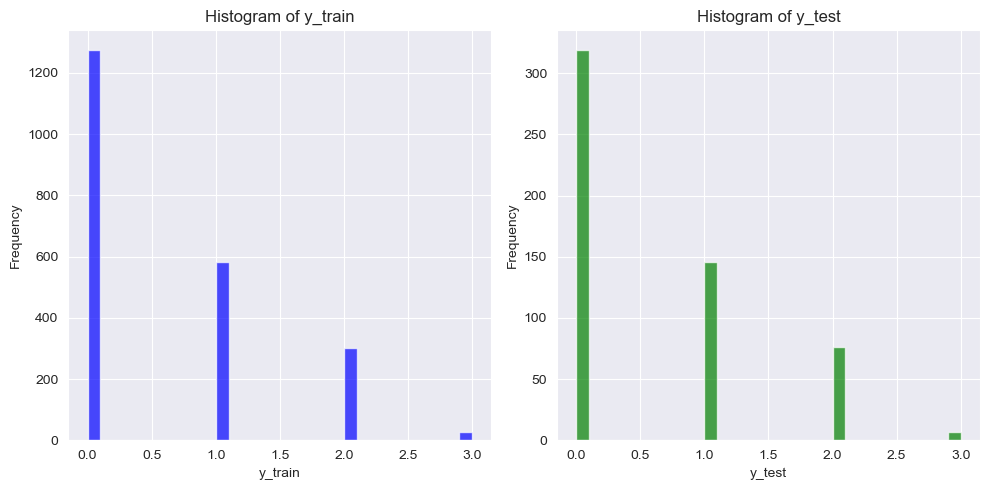

In [3]:
import matplotlib.pyplot as plt

# Plot histogram of y_train and y_test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of y_train')
plt.xlabel('y_train')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='green', alpha=0.7)
plt.title('Histogram of y_test')
plt.xlabel('y_test')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()